In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data_train = pd.read_csv(r"E:\machine learning\decision tree\titanic\train.csv")

In [3]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# data preprocessing

In [6]:
#to select features
data_train.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

In [7]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
#to fill missing entries
data_train['Age']=data_train['Age'].fillna(data_train['Age'].mean())

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
#drop rows with any NAN
data_train = data_train.dropna(axis=0,how="any")

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [12]:
#convert characters to numbers
labels = data_train['Embarked'].unique().tolist()
print(labels)

['S', 'C', 'Q']


In [13]:
data_train["Embarked"] = data_train["Embarked"].apply(lambda x: labels.index(x))

In [14]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [15]:
data_train['Sex'] = (data_train['Sex']=='male').astype('int')

In [16]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [17]:
x = data_train.iloc[:,data_train.columns!='Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [18]:
y = data_train.iloc[:,data_train.columns =='Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [19]:
xtrain, xtest, ytrain, ytest =train_test_split(x.iloc[:,1:],y,test_size=0.3)

In [20]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
456,1,1,65.000000,0,0,26.5500,0
300,3,0,29.699118,0,0,7.7500,2
292,2,1,36.000000,0,0,12.8750,1
95,3,1,29.699118,0,0,8.0500,0
529,2,1,23.000000,2,1,11.5000,0
...,...,...,...,...,...,...,...
234,2,1,24.000000,0,0,10.5000,0
831,2,1,0.830000,1,1,18.7500,0
657,3,0,32.000000,1,1,15.5000,2
502,3,0,29.699118,0,0,7.6292,2


In [21]:
for d in [xtrain, xtest, ytrain, ytest]:
    d.index = range(d.shape[0])

In [22]:
clf = DecisionTreeClassifier(random_state=30)
clf = clf.fit(xtrain,ytrain)
score = clf.score(xtest,ytest)

score

0.7415730337078652

In [29]:
clf = DecisionTreeClassifier(random_state=30)
scores = cross_val_score(clf, x.iloc[:,1:], y, cv=10)
print(scores)
print("mean: {:.2f}".format(score.mean()))

[0.73033708 0.78651685 0.70786517 0.75280899 0.82022472 0.7752809
 0.82022472 0.7752809  0.86516854 0.78409091]
mean: 0.78


In [30]:
#modify our models, learning curve
#max_depth

max score of test: 0.82


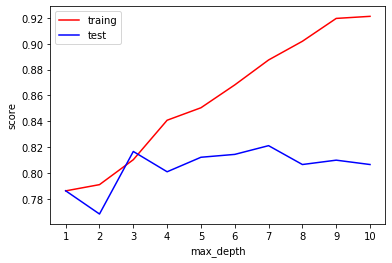

In [36]:
scores_train=[]
scores_test=[]

for i in range(10):
    clf = DecisionTreeClassifier(random_state=30
                                ,max_depth=i+1
                                ,criterion='entropy')
    clf.fit(xtrain,ytrain)
    score_train = clf.score(xtrain,ytrain)
    #score_test = clf.score(xtest,ytest)
    score_test = cross_val_score(clf,x.iloc[:,1:],y,cv=10).mean()
    scores_train.append(score_train)
    scores_test.append(score_test)
print("max score of test: {:.2f}".format(max(scores_test)))
plt.plot(range(1,11),scores_train,c='red',label='traing')
plt.plot(range(1,11),scores_test,c='blue',label='test')
plt.xticks(range(1,11))
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

In [37]:
# grid-searching technique to optimize parameters
# computationally expensive

In [40]:
#gini_threshhold=np.linspace(0,0.5,50)

parameters = {"criterion":("gini","entropy")
              ,"splitter":("best","random")
              ,"max_depth":[*range(2,6)]
              ,"min_samples_leaf":[*range(1,50,5)]
              ,"min_impurity_decrease": [*np.linspace(0,0.5,50)]
}
clf = DecisionTreeClassifier(random_state=30)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(x.iloc[:,1:],y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=30,
                                              splitter='best'),
             iid='warn', n_...
                                                   0.2040816326530612,
                                                   0.21428571428571427,
 

In [41]:
#best parameters
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_impurity_decrease': 0.01020408163265306,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [42]:
#best score
GS.best_score_

0.8177727784026997